## Clustering

Clustering is a Machine Learning technique that involves the grouping of data points. 
Basic Algorithm for K-Means
- Randomly pick K points to place K centroids
- Assign all of the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Average all of the points belonging to eachcnetroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Reassign every point once again to the clsest centroid.
Repeat steps 3-4 until no point changes which centroid it belongs to.

## Hidden Markov Models

The Hidden markov    Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution. Transitions among the states are governed by a set of probabilities called transition probabilites.

A hidden markov model works with probabilities to predict future events or states.  

To create a hidden markov model we need.
- States
- Observation Distribution
- Transition Distribution

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


## Weather Model

We will model a simple weather system and try to predict the temperature on each day given the following information.
1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [8]:
tfd = tfp.distributions

initial_distribution = tfd.Categorical(probs=[0.8, 0.2]) # making a shortcut for later on
transition_distribution = tfd.Categorical(probs=[[0.7,0.3],
                                                 [0.2, 0.8]]) # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale = [5., 10.]) # refer to point 5 above



ValueError: Arg specs do not match: original=FullArgSpec(args=['input', 'out_type', 'name'], varargs=None, varkw=None, defaults=(None, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), new=FullArgSpec(args=['input', 'out_type', 'name'], varargs=None, varkw=None, defaults=(tf.int32, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), fn=<function size_v2 at 0x000001EB7CD02700>

In [ ]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7
)

## Optimizer

You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described. Here is a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerateed Gradient

## Creating a Neural Network

In [11]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [12]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and train

4422102/4422102 [==============================] - 0s 0us/step


Looking at the data

In [13]:
train_images.shape

(60000, 28, 28)

60,000 images that are made up of 28x28 pixels (784)

In [14]:
train_images[0,23,23] # looking at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [15]:
train_labels[:10] # first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers randing from 0-9. Each integer represents a specefic article of clothing. We'll create an array of label names to indicate which is which.

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

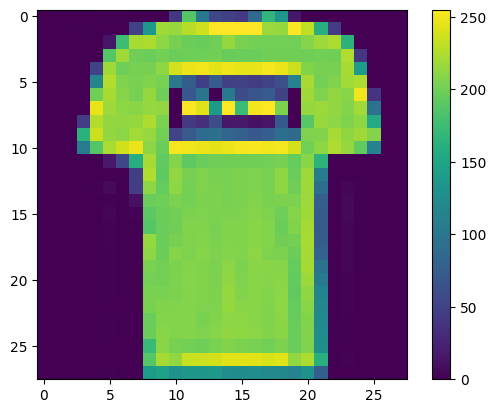

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel value (0-255) to be between 0 and 1. We can do this by dividing each value in the training nad testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model

Now it's time to build the model, We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Layer 1: This is our input later and it will consist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probability of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a porbability distributuon for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.

## Compile the Model

The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now. 

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

Now it's finally time to train the model. Since we've already done all of the work on our data this step is as easy as calling a single method.

In [22]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, as labels and epochs and watch !

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4909 - accuracy: 0.8279
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3740 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3342 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3096 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2932 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2779 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2556 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2457 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.237

## Evaluating the Model

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 847us/step - loss: 0.3321 - accuracy: 0.8873
Test accuracy: 0.8873000144958496


## Making Predictions

To make predictions we simply need to pass an array of data in the form we've specified in the input layer 

In [24]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 798us/step


This method returns to us an array of predictions for each image we passed it. 

In [25]:
predictions[0]

array([8.6129148e-09, 7.9604261e-11, 1.4740714e-10, 3.2220464e-13,
       1.9111346e-09, 3.2771647e-04, 3.1765075e-09, 6.7023458e-03,
       2.8670287e-08, 9.9296993e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax() This simply returns the index of the maximum value from an numpy array

313/313 [==============================] - 0s 776us/step
Pullover


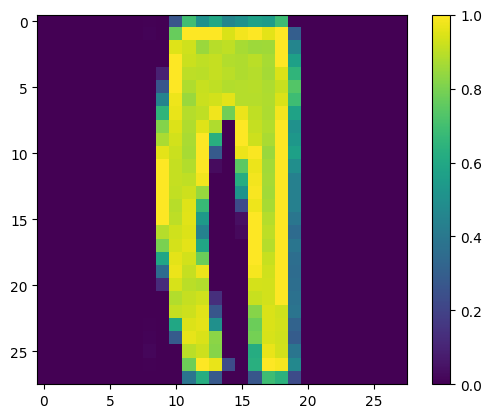

In [26]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 15ms/step


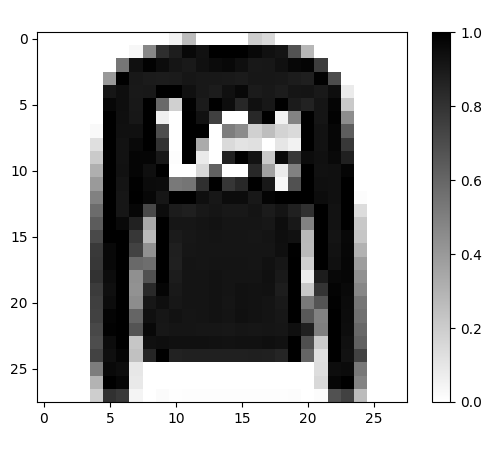

In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image])) 
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected:" + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)            